In [25]:
# Load Libraries

import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from numpy import linalg as la
from random import sample

import matplotlib.gridspec as gridspec

# Setting Constants

TI_limit = 25; 
TR = 7500; # (7.5 sesconds) T1 affects next slive

In [2]:
# Loading in Image 

img_nifti = nib.load("param_86_res_modelling.nii")

img =img_nifti.dataobj[:,:,:,:]


In [4]:
img.shape

(77, 92, 6, 100)

In [3]:
# Importing Parameters

p = np.loadtxt('86_param_sel_modelling.txt')
p.shape

(100, 86)

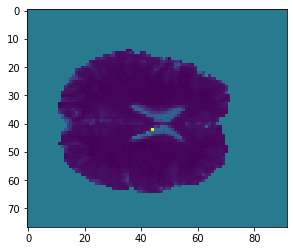

In [14]:
plt.imshow(img[:,:,0,40])

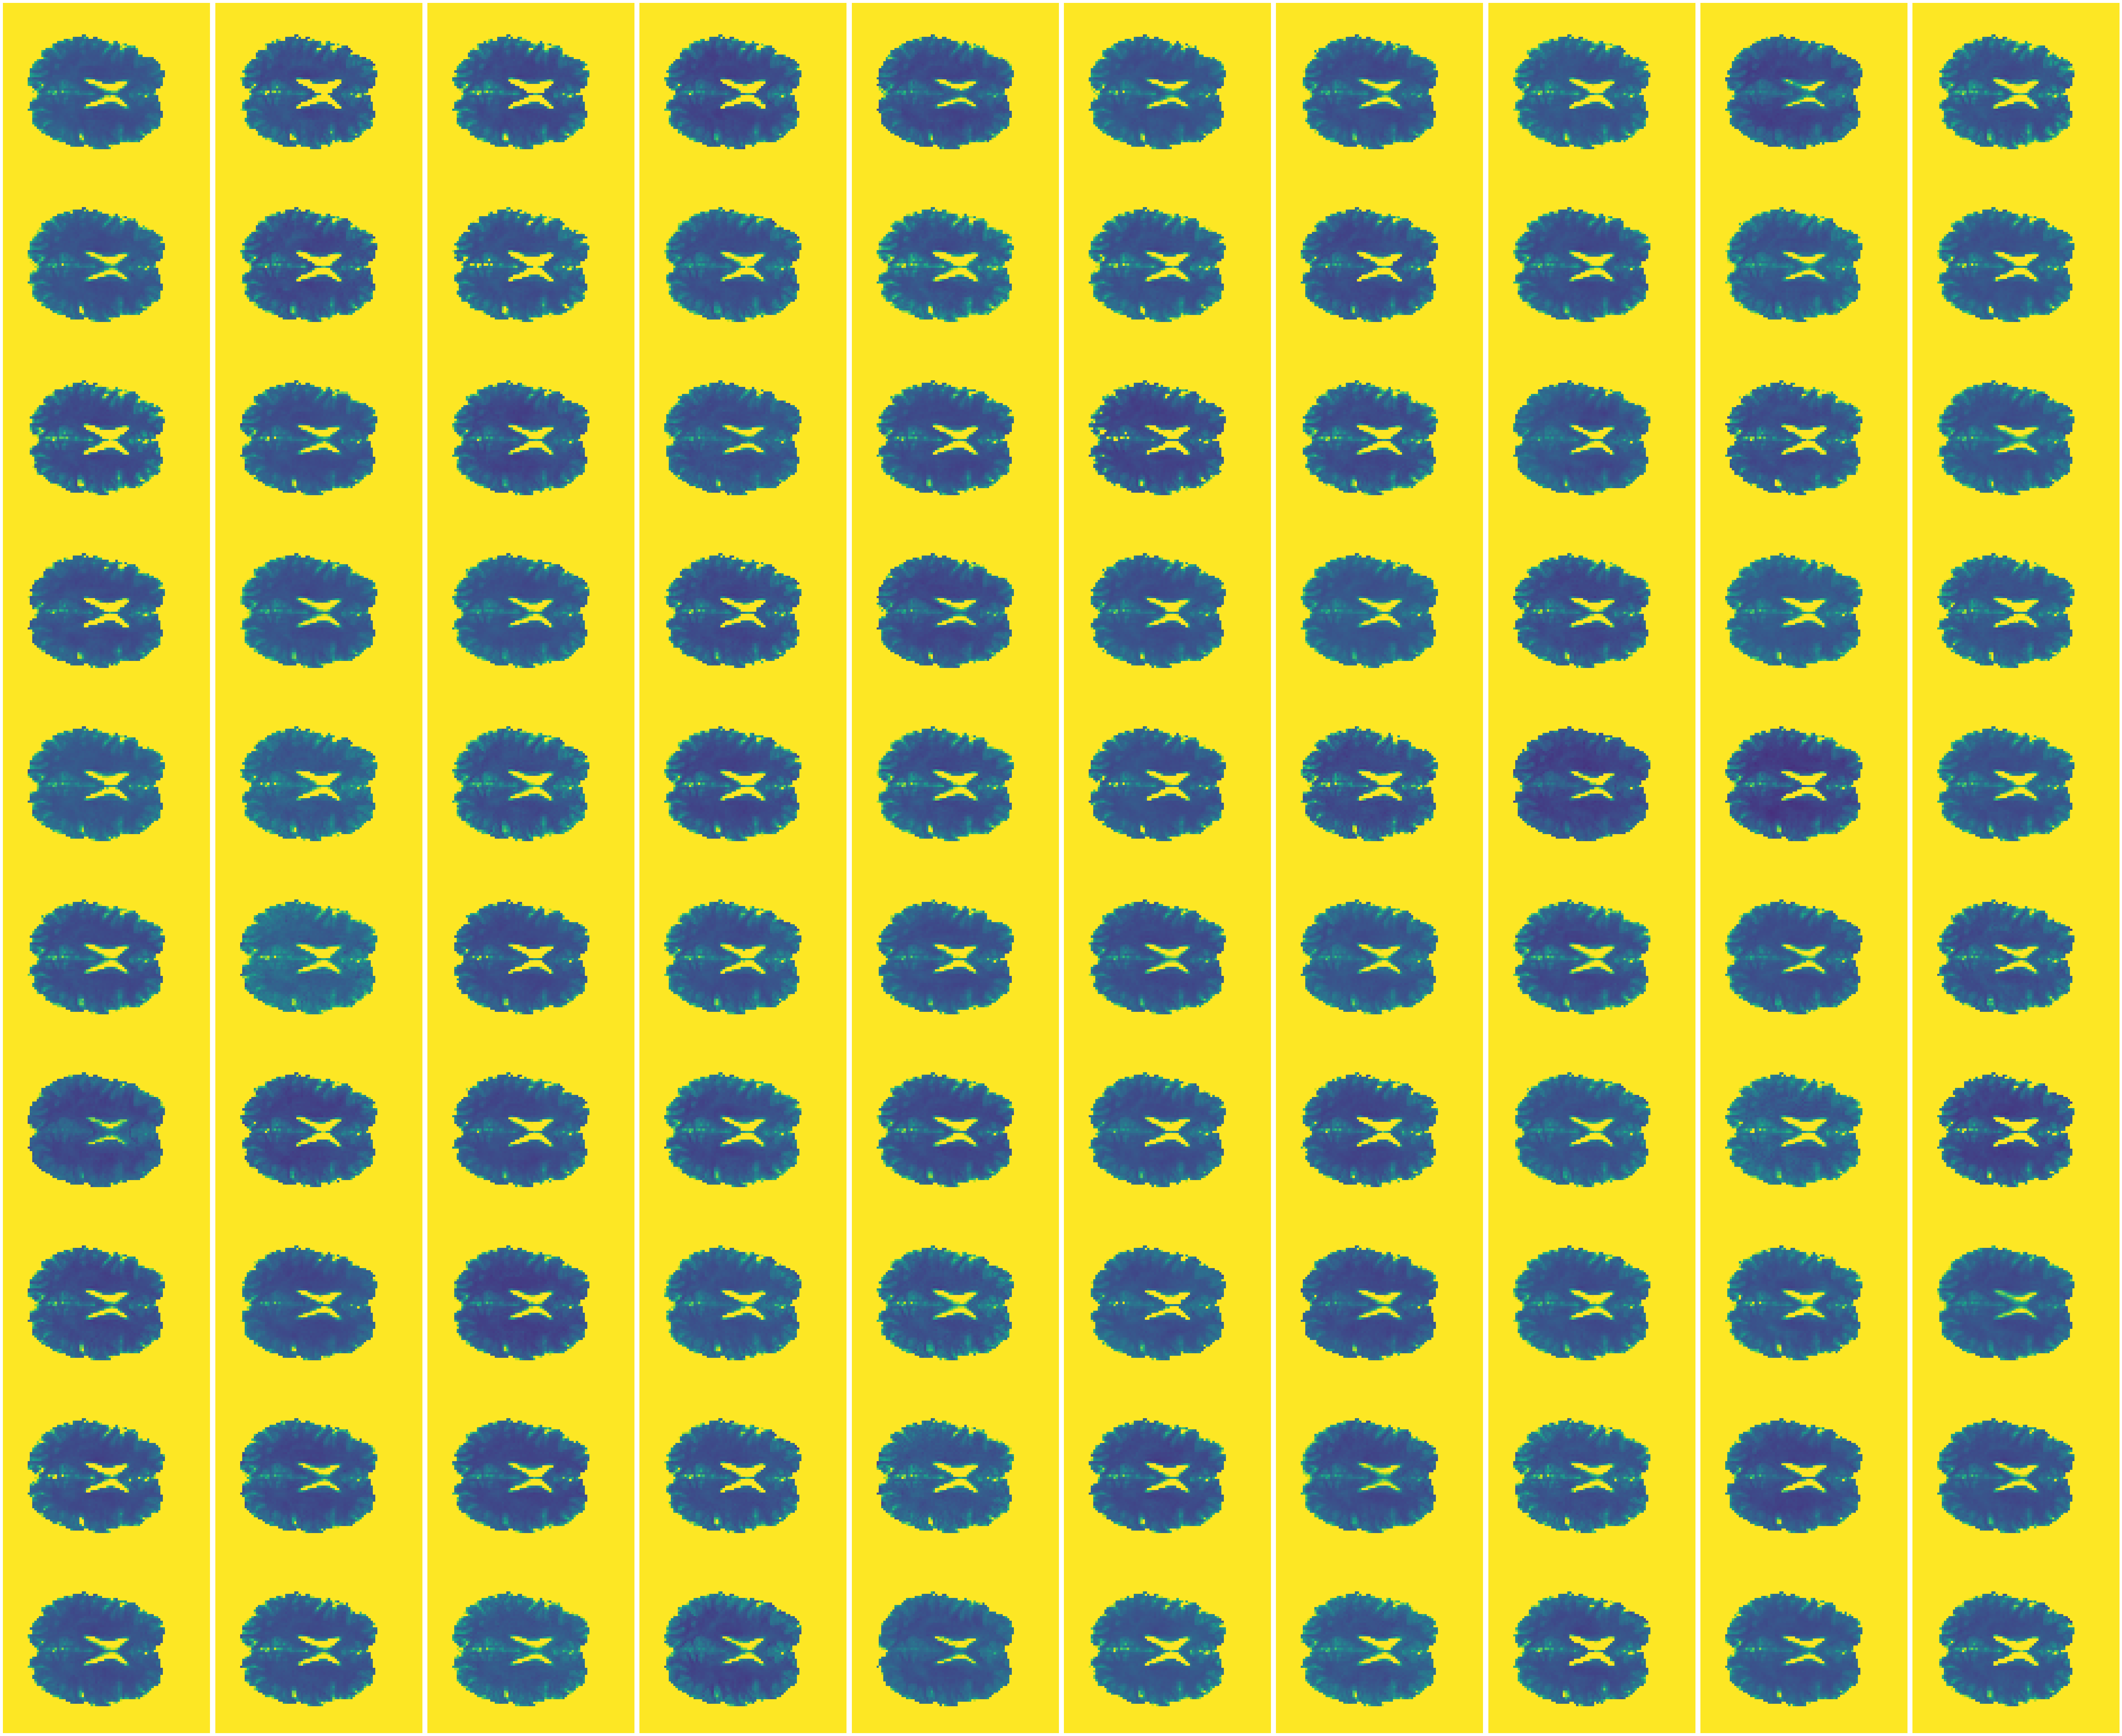

In [50]:
# MD Maps

plt.figure(figsize=(92,77))
gs1 = gridspec.GridSpec(10, 10, wspace=0.0, hspace=0.0)

for i in range (0,100): 
        plt.subplot(gs1[i])
        plt.imshow(img[:,:,0,i])
        plt.axis('off')
        plt.clim(0, 2)
        
plt.savefig("86_MD.png", bbox_inches=0)

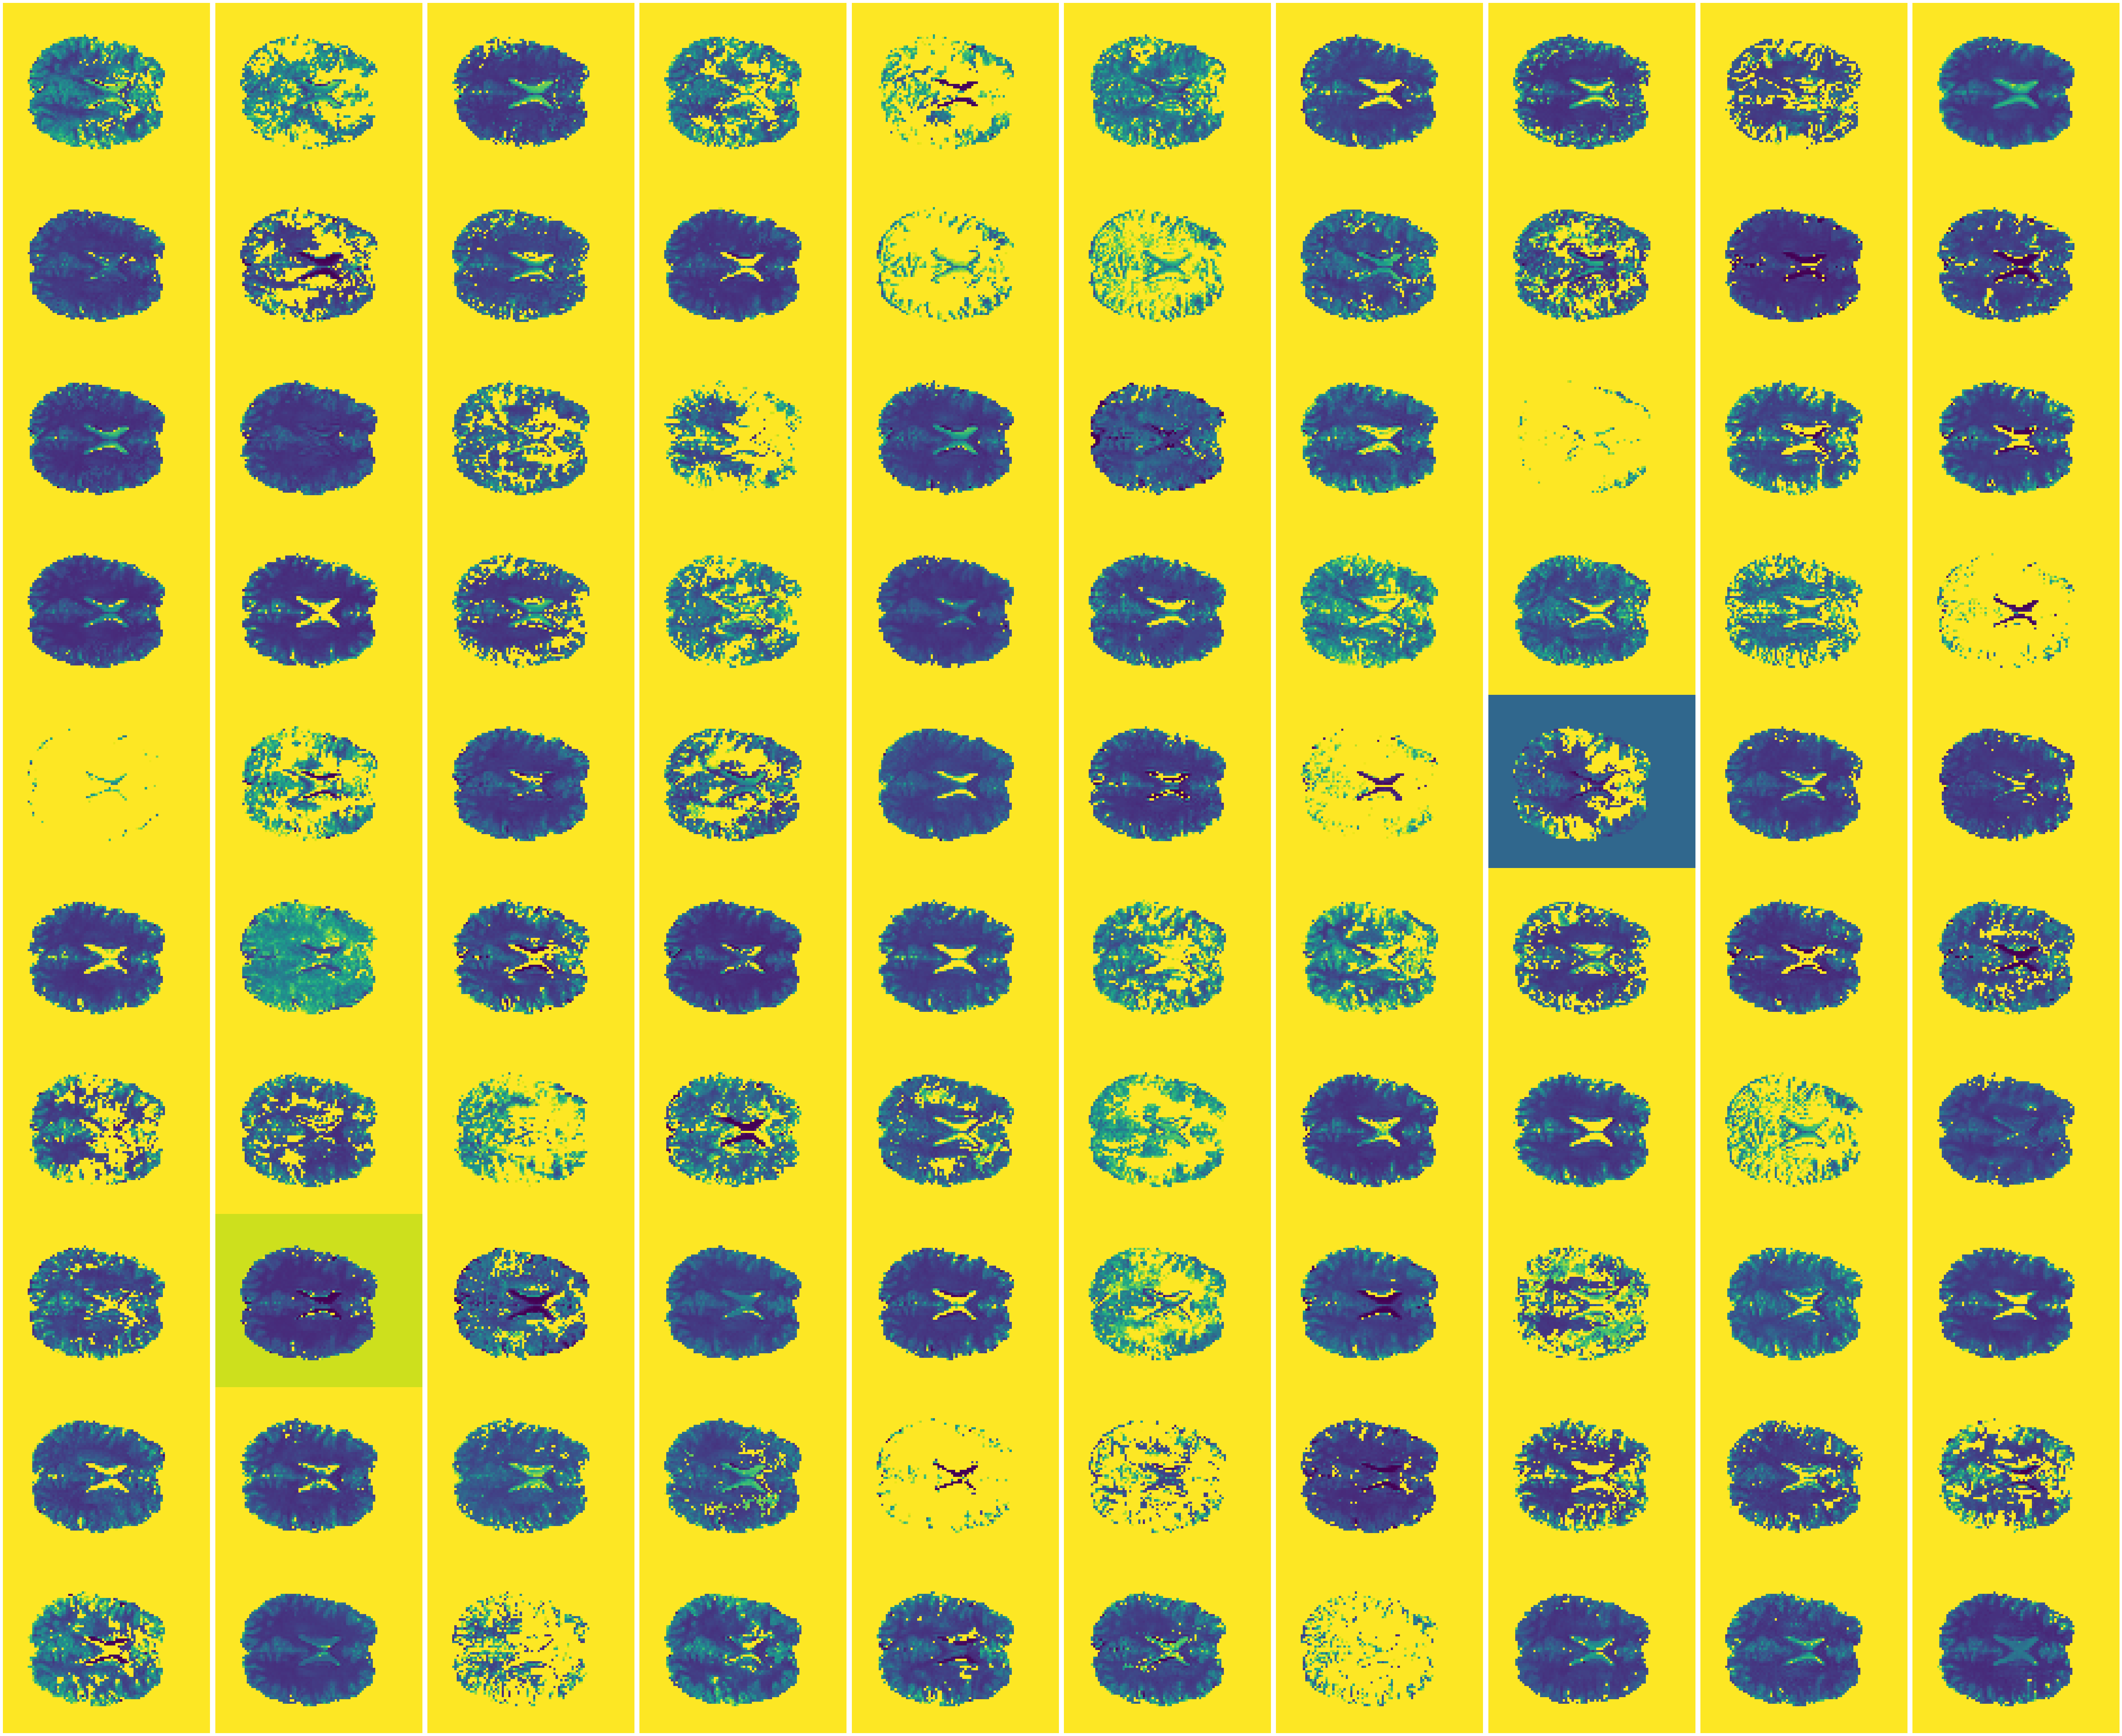

In [51]:
# T1 

plt.figure(figsize=(92,77))
gs1 = gridspec.GridSpec(10, 10, wspace=0.0, hspace=0.0)

for i in range (0,100): 
        plt.subplot(gs1[i])
        plt.imshow(img[:,:,2,i])
        plt.clim(0, 5.5e3)
        plt.axis('off')
        
plt.savefig("86_T1.png", bbox_inches=0)

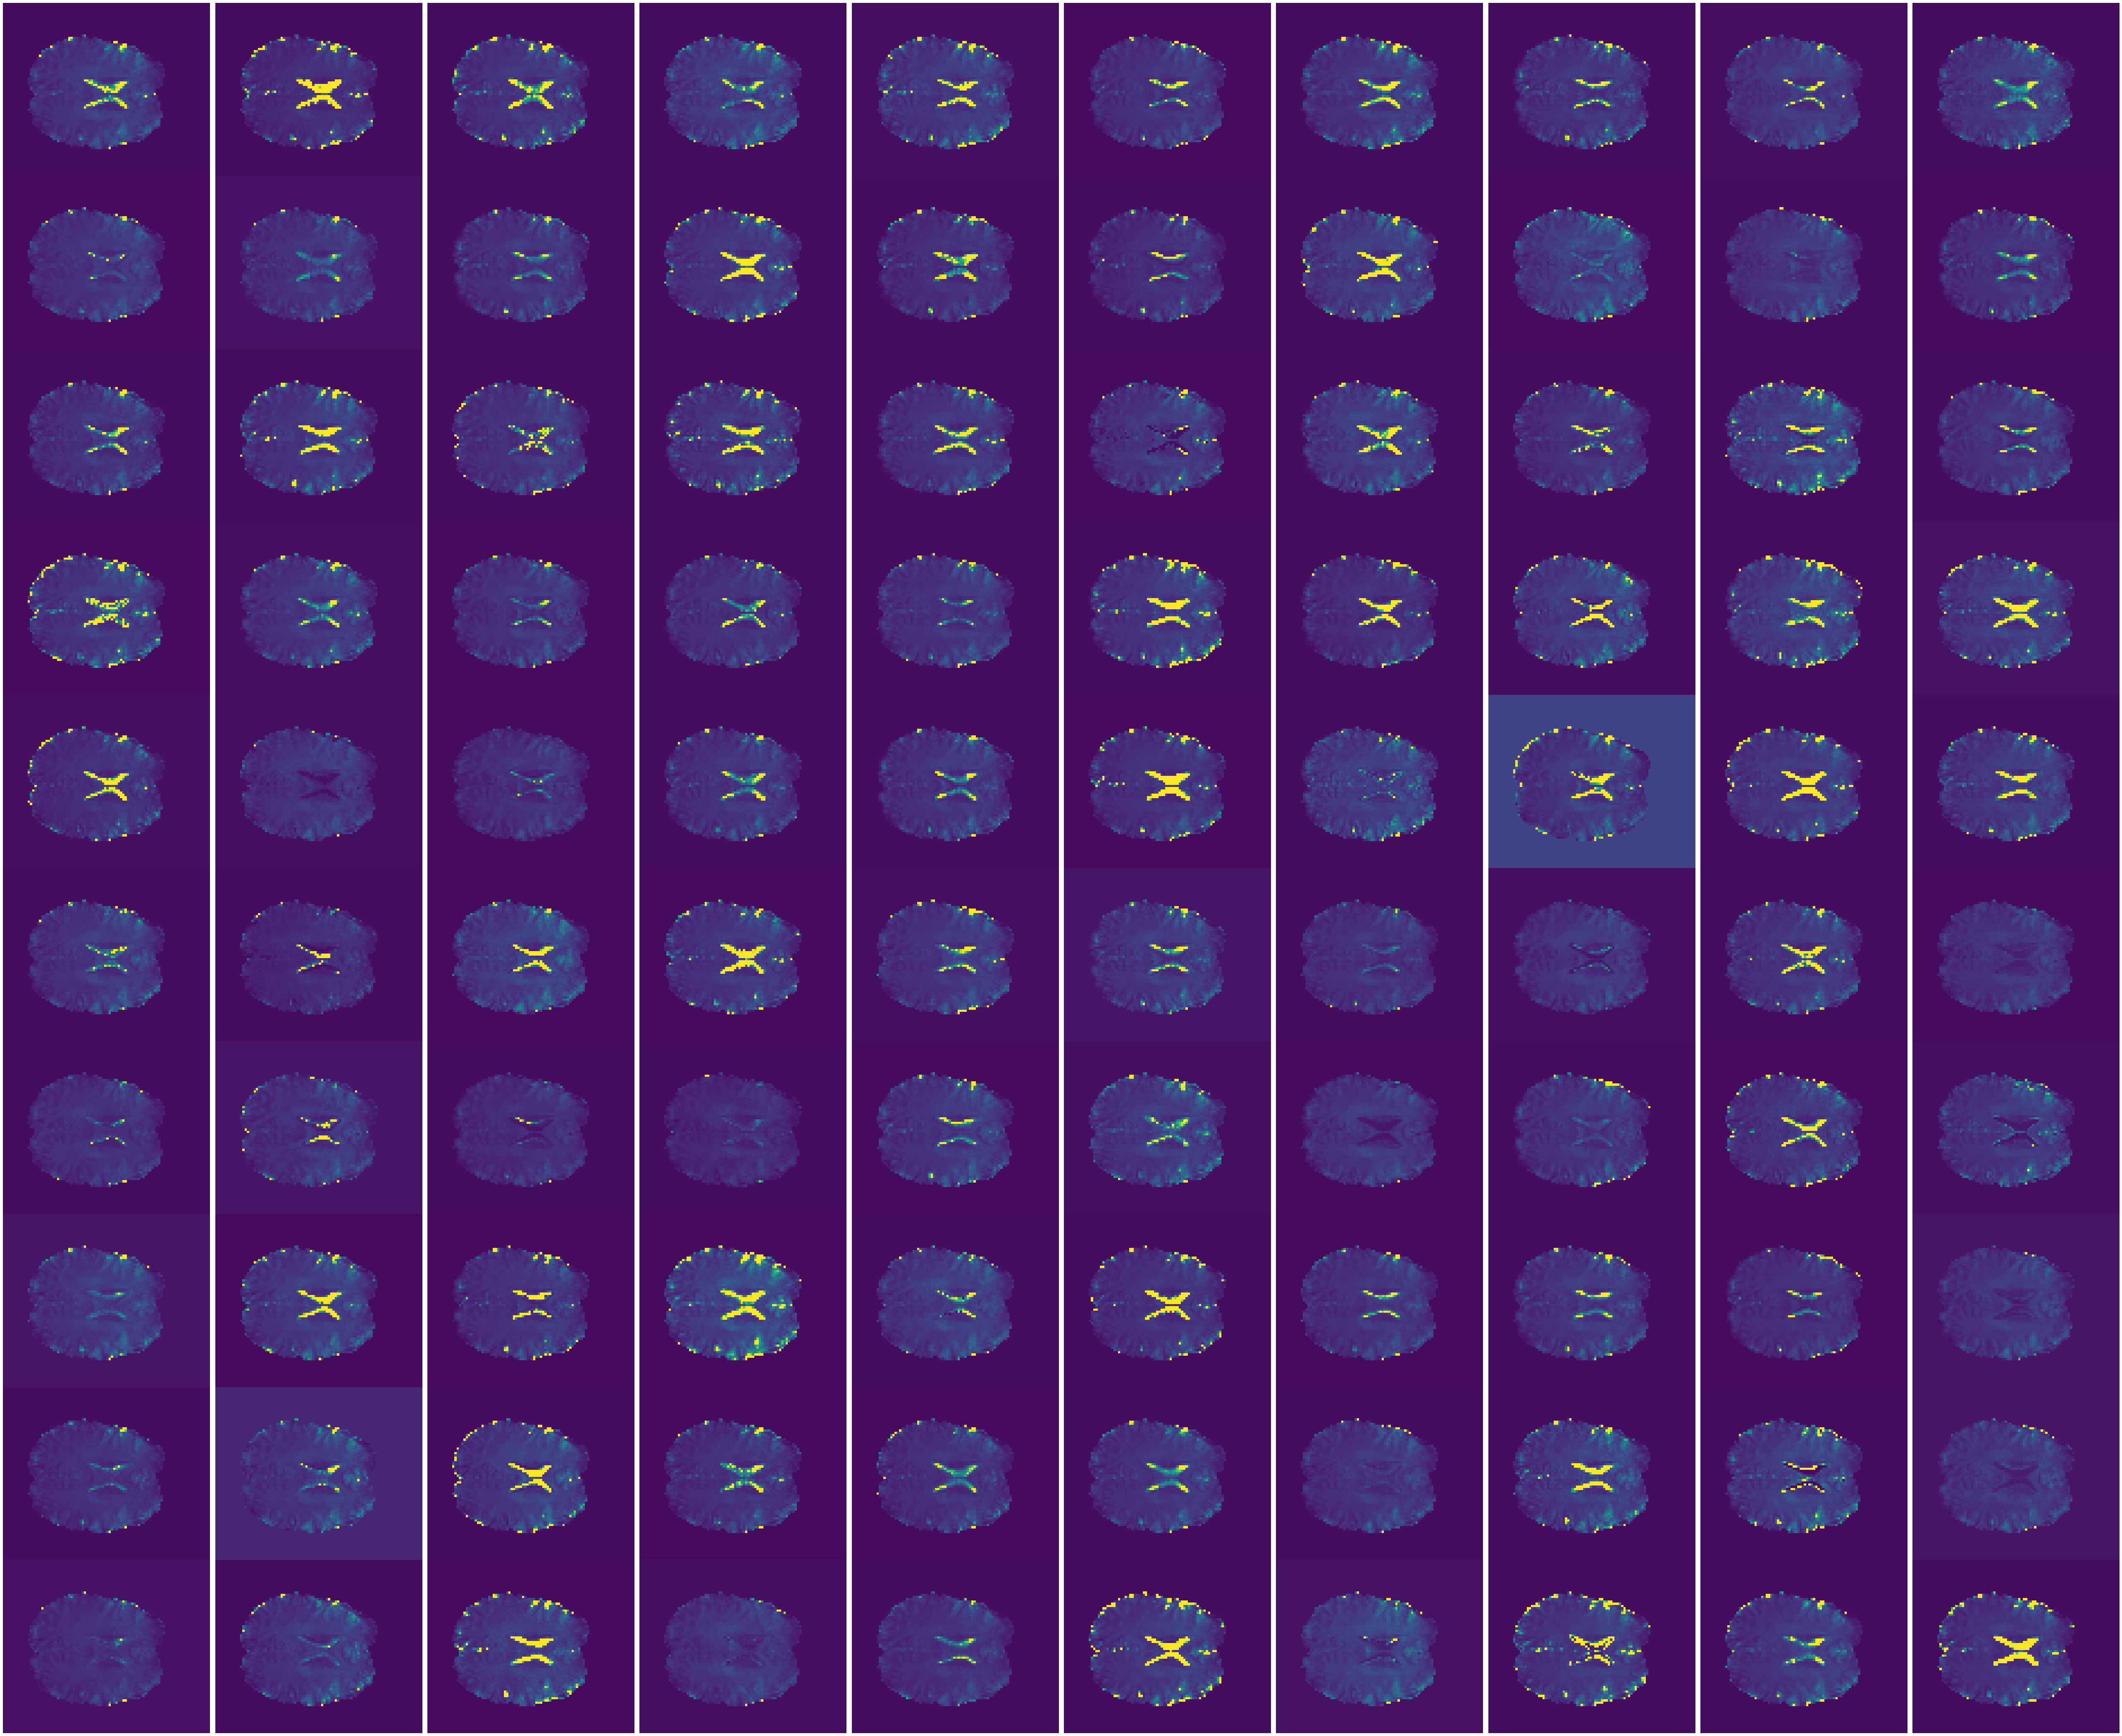

In [52]:
# T2

plt.figure(figsize=(92,77))
gs1 = gridspec.GridSpec(10, 10, wspace=0.0, hspace=0.0)

for i in range (0,100): 
        plt.subplot(gs1[i])
        plt.imshow(img[:,:,3,i])
        plt.clim(0,350)
        plt.axis('off')
        
plt.savefig("86_T2.png", bbox_inches=0)

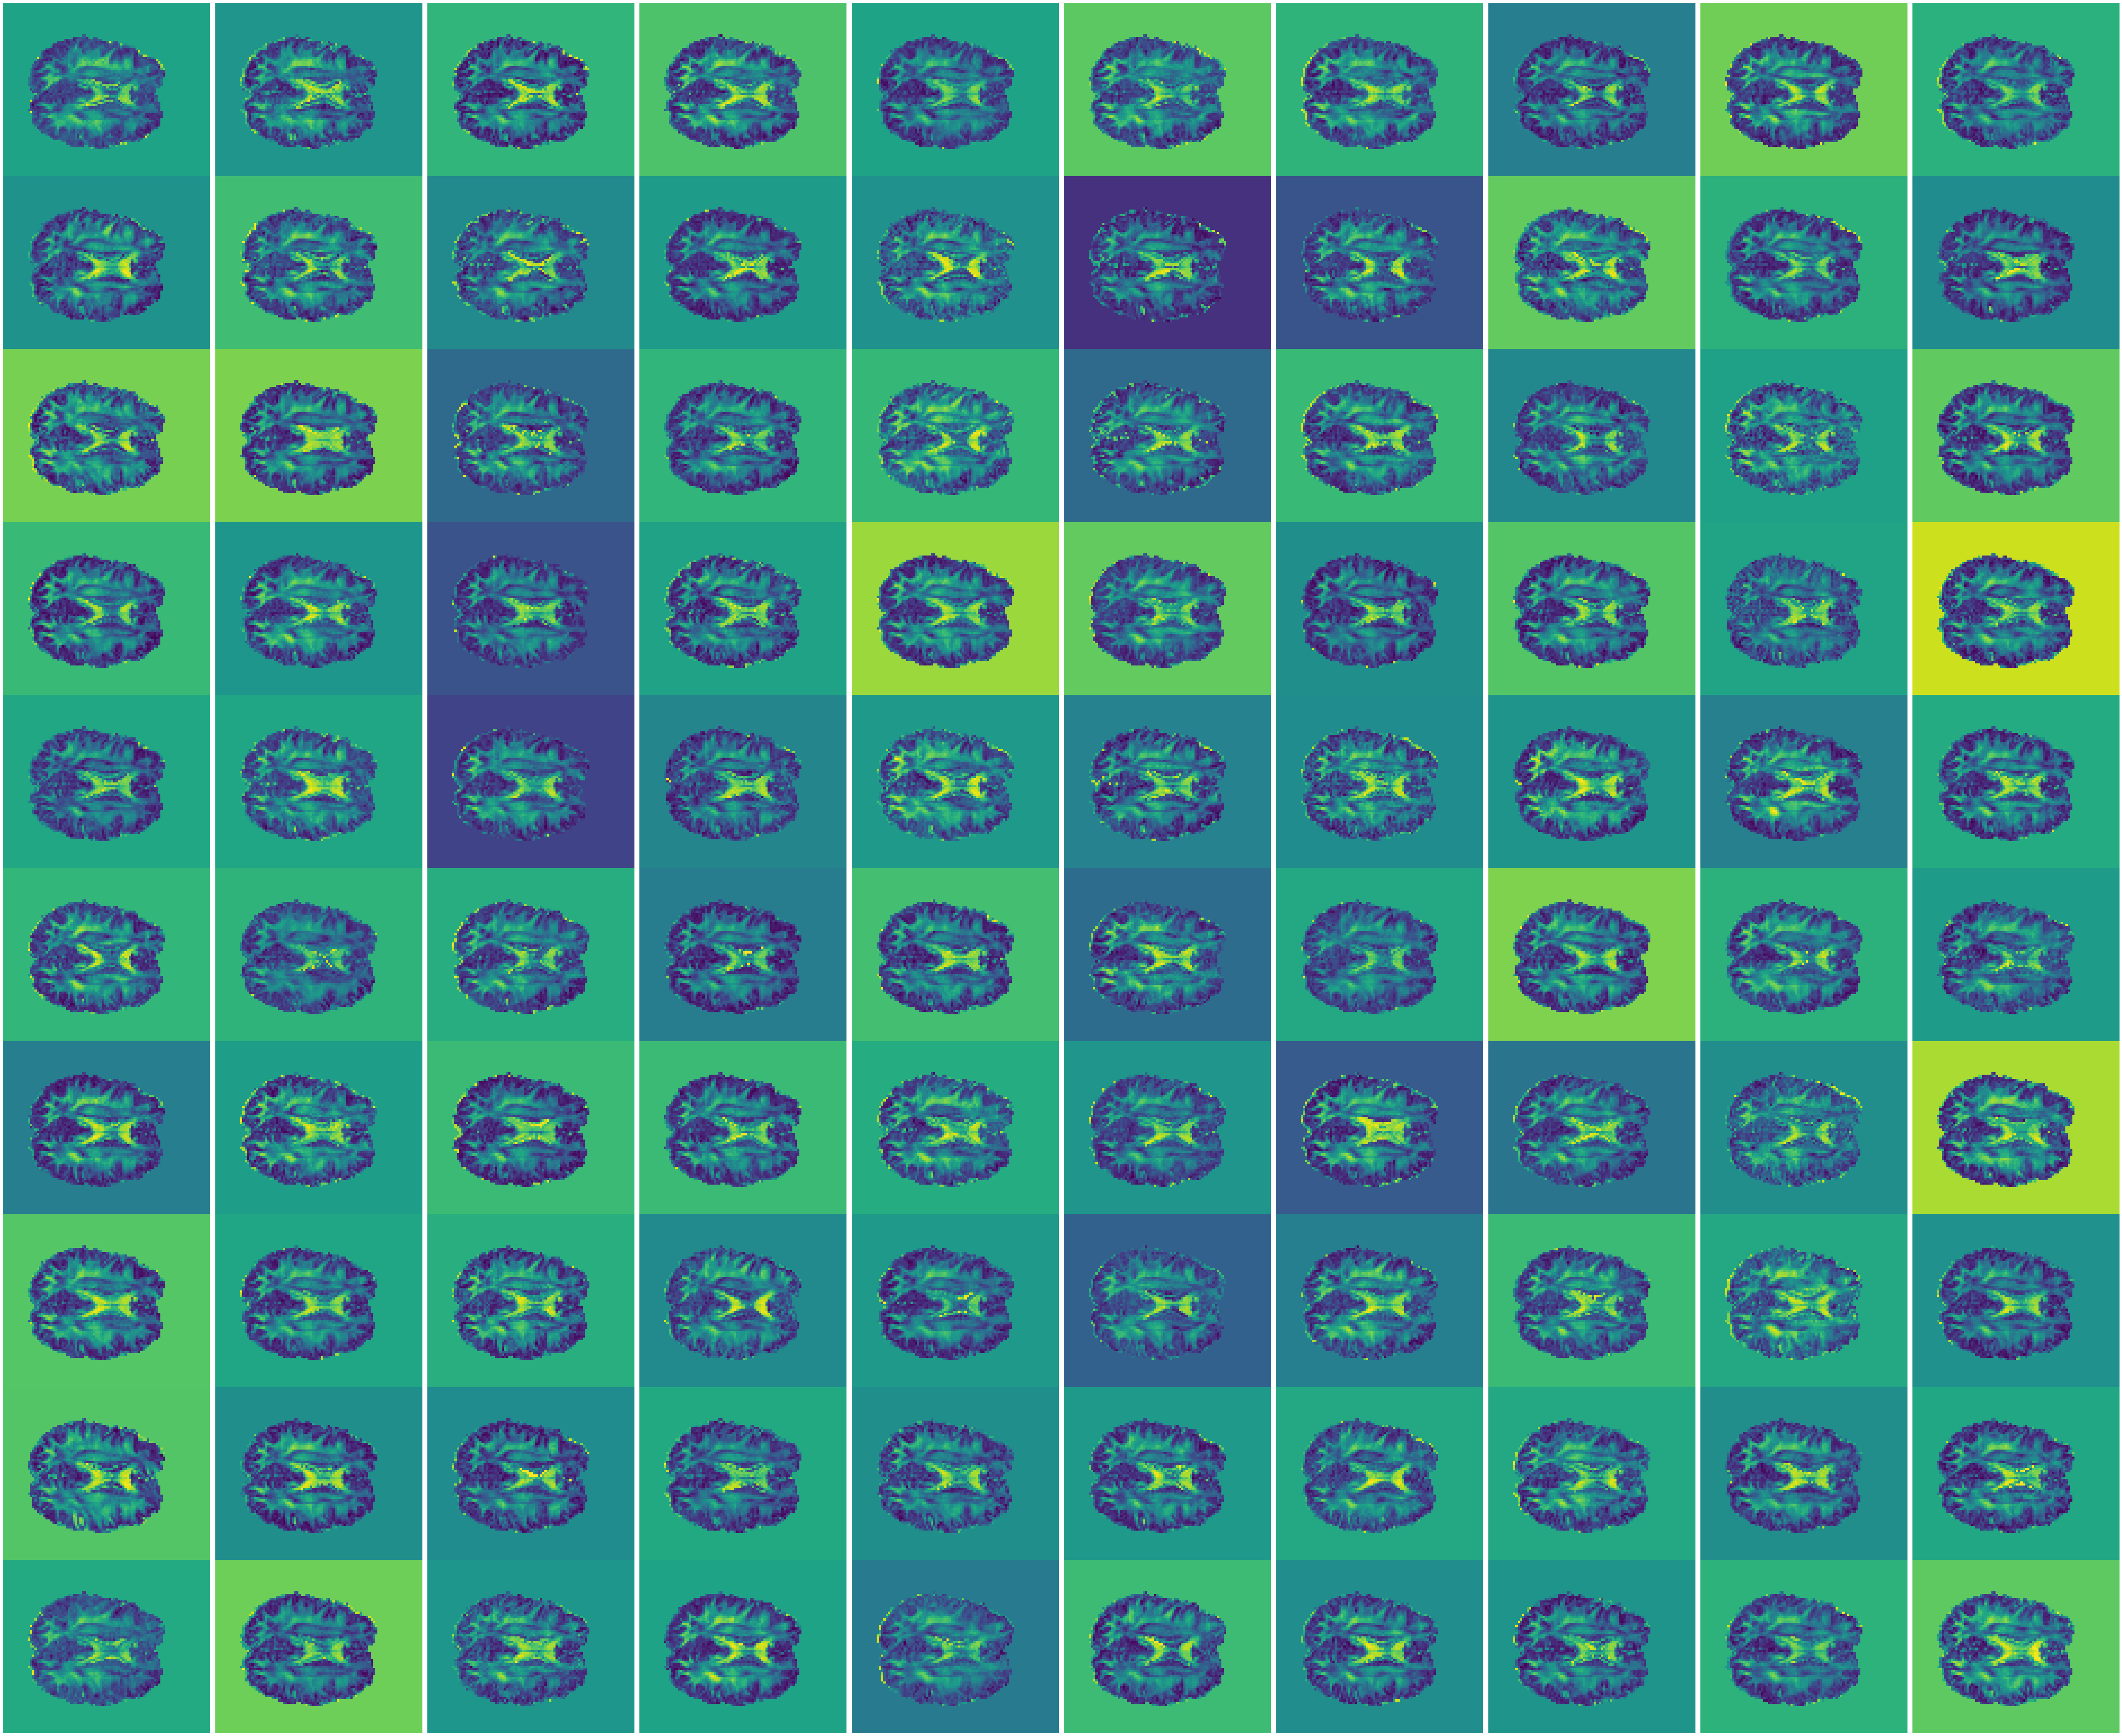

In [49]:
# FA

plt.figure(figsize=(92,77))
gs1 = gridspec.GridSpec(10, 10, wspace=0.0, hspace=0.0)

for i in range (0,100): 
        plt.subplot(gs1[i])
        plt.imshow(img[:,:,5,i])
        plt.axis('off')
        
plt.savefig("86_FA.png", bbox_inches=0)

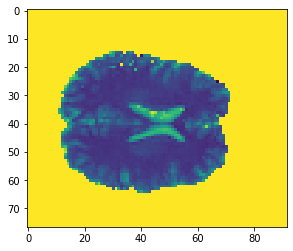

In [53]:
plt.imshow(img[:,:,2,9])
plt.clim(0, 5.5e3)

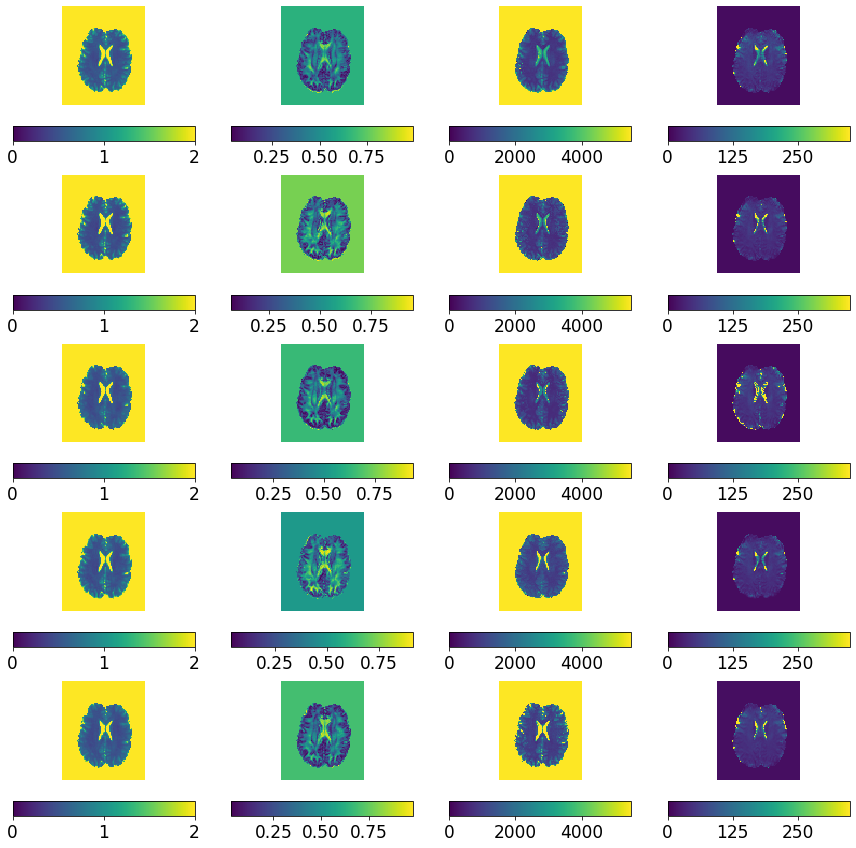

In [70]:
plt.figure(figsize=(15,15))
gs = gridspec.GridSpec(5, 4)

series = np.array([9, 20, 30, 44, 54])

for i in range (0, 5):
    n = series[i]
    
    md = np.rot90(img[:,:,0,n],45)
    fa = np.rot90(img[:,:,5,n],45)
    t1 = np.rot90(img[:,:,2,n],45)
    t2 = np.rot90(img[:,:,3,n],45)

    plt.subplot(gs[0+i*4])
    plt.imshow(md)
    plt.clim(0, 2)
    plt.axis('off')
    cbar = plt.colorbar(orientation='horizontal', aspect =12)
    cbar.ax.tick_params(labelsize=17)

    plt.subplot(gs[1+i*4])
    plt.imshow(fa)
    plt.axis('off')
    cbar = plt.colorbar(orientation='horizontal', aspect =12)
    cbar.ax.tick_params(labelsize=17)

    plt.subplot(gs[2+i*4])
    plt.imshow(t1)
    plt.clim(0, 5.5e3)
    plt.axis('off')
    cbar = plt.colorbar(orientation='horizontal', aspect =12)
    cbar.ax.tick_params(labelsize=17)

    plt.subplot(gs[3+i*4])
    plt.imshow(t2)
    plt.clim(0,350)
    plt.axis('off')
    cbar = plt.colorbar(ticks=[0, 125, 250], orientation='horizontal', aspect =12)
    cbar.ax.tick_params(labelsize=17)

In [71]:
p.shape

(100, 86)

In [75]:
p9 = p[9,:]
p20 = p[20,:]
p30 = p[30,:]
p44 = p[44,:]
p54 = p[54,:]

In [76]:
params = np.concatenate((p9,p20,p30,p44,p54))

In [78]:
params.shape

(430,)

In [90]:
unique, counts = np.unique(params, return_counts=True)
dict(zip(unique, counts))

{0.0: 1,
 1.0: 1,
 5.0: 1,
 10.0: 1,
 12.0: 1,
 20.0: 1,
 21.0: 2,
 22.0: 1,
 29.0: 1,
 31.0: 1,
 32.0: 2,
 34.0: 1,
 40.0: 1,
 42.0: 1,
 44.0: 1,
 46.0: 1,
 58.0: 1,
 61.0: 1,
 63.0: 1,
 67.0: 1,
 68.0: 1,
 72.0: 2,
 82.0: 1,
 83.0: 2,
 86.0: 1,
 91.0: 1,
 96.0: 1,
 97.0: 1,
 101.0: 1,
 102.0: 1,
 105.0: 1,
 111.0: 1,
 113.0: 1,
 116.0: 1,
 118.0: 1,
 121.0: 1,
 129.0: 2,
 141.0: 1,
 142.0: 2,
 143.0: 1,
 148.0: 1,
 151.0: 1,
 154.0: 1,
 156.0: 1,
 157.0: 1,
 170.0: 1,
 173.0: 2,
 176.0: 1,
 178.0: 1,
 179.0: 2,
 180.0: 3,
 181.0: 3,
 186.0: 1,
 195.0: 1,
 197.0: 1,
 203.0: 1,
 206.0: 1,
 208.0: 1,
 209.0: 1,
 212.0: 1,
 215.0: 1,
 217.0: 1,
 223.0: 1,
 225.0: 1,
 227.0: 1,
 228.0: 1,
 230.0: 2,
 232.0: 1,
 233.0: 1,
 249.0: 1,
 250.0: 1,
 251.0: 1,
 253.0: 1,
 254.0: 1,
 255.0: 1,
 256.0: 1,
 259.0: 1,
 261.0: 2,
 266.0: 2,
 273.0: 1,
 274.0: 1,
 275.0: 2,
 276.0: 2,
 277.0: 2,
 280.0: 1,
 286.0: 1,
 287.0: 1,
 288.0: 1,
 296.0: 2,
 301.0: 1,
 305.0: 1,
 307.0: 1,
 310.0: 1,
 321.0: 

([<matplotlib.axis.YTick at 0x1cbc24e4748>,
 <a list of 4 Text yticklabel objects>)

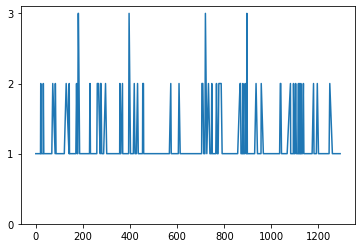

In [140]:
plt.plot(unique, counts)
plt.yticks([0,1,2,3])

Text(0.5, 0, 'Parameter Set Number')

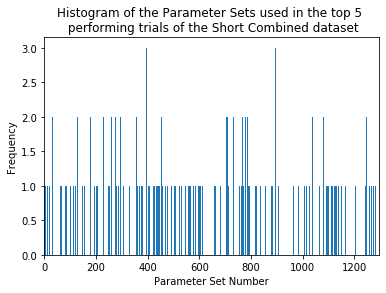

In [149]:
plt.hist(params, bins = 1296)
plt.xlim([0,1296])
plt.title('Histogram of the Parameter Sets used in the top 5 \n performing trials of the Short Combined dataset')
plt.ylabel('Frequency')
plt.xlabel('Parameter Set Number')

In [163]:
x = np.arange(430)
counts3 = unique[np.where(counts == 3)]

In [123]:
counts2 = unique[np.where(counts==2)]
counts2.astype(int)
print(counts2)

[  21.   32.   72.   83.  129.  142.  173.  179.  230.  261.  266.  275.
  276.  277.  296.  357.  368.  418.  432.  454.  457.  573.  608.  705.
  708.  709.  733.  747.  767.  777.  779.  787.  867.  869.  879.  889.
  935.  957. 1038. 1040. 1081. 1094. 1103. 1115. 1119. 1125. 1136. 1179.
 1195. 1248.]


In [162]:
unique[np.where(counts == 3)].shape

(5,)

In [176]:
counts1 = unique[np.where(counts==1)]

Text(0, 0.5, 'Frequency')

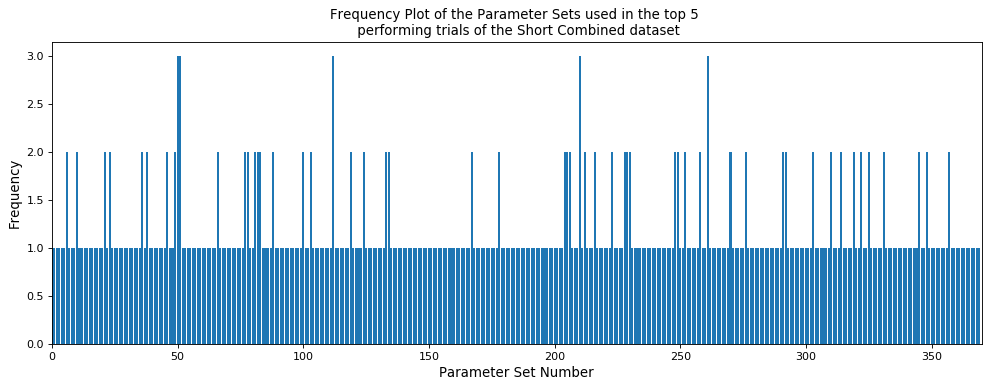

In [167]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
x = np.arange(370)
# plt.ylim([0,3])
plt.xlim([0, 370])
plt.bar(x, counts)
# plt.xticks(x, unique)
plt.title('Frequency Plot of the Parameter Sets used in the top 5 \n performing trials of the Short Combined dataset', fontsize=12)
plt.xlabel('Parameter Set Number', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

In [ ]:
test = np.load()

In [180]:
p9.shape

(86,)

In [181]:
counts9.shape

(86,)

In [185]:
p9

array([  96., 1125., 1248., 1106.,  608.,  276.,   44.,  180.,  435.,
         83.,  563.,  157.,  797.,  987., 1094.,  256.,  173.,  787.,
        794., 1191.,  832.,   72.,  310.,  889.,  261.,  596.,  779.,
         20.,  357.,  369., 1286.,  883.,  547.,  709., 1260., 1164.,
        148.,  818.,  457.,  277.,  720.,  209.,  684.,  895.,  253.,
         22.,  548.,  414.,  867., 1244.,  508.,  618., 1119.,  565.,
       1022.,  396.,  321., 1090.,  371.,  634., 1173.,  553.,  605.,
        616.,  956., 1059.,  266.,  767.,  896., 1129.,  181.,  454.,
        233., 1055., 1167., 1067.,  907.,  176.,  660.,  676.,   12.,
        469., 1043.,  105.,   34.,  951.])

In [190]:
unique9, counts9 = np.unique(p20, return_counts=True)

Text(0, 0.5, 'Frequency')

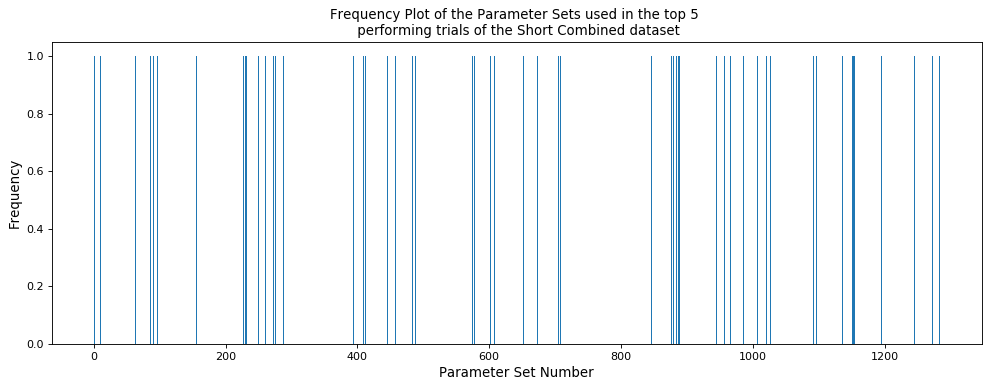

In [195]:
unique9, counts9 = np.unique(p54, return_counts=True)
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
x = np.arange(86)
# plt.ylim([0,3])
# plt.xlim([0, 5])
plt.bar(unique9, counts9.astype(int))
#plt.bar(counts2.astype(int), counts[np.where(counts == 2)])
#plt.bar(counts1.astype(int), counts[np.where(counts == 1)])
# plt.xticks(x, unique)
plt.title('Frequency Plot of the Parameter Sets used in the top 5 \n performing trials of the Short Combined dataset', fontsize=12)
plt.xlabel('Parameter Set Number', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

In [172]:
counts3.astype(int)

array([180, 181, 396, 720, 896])

In [200]:
'{0:f}'.format(str(counts1)) 

ValueError: Unknown format code 'f' for object of type 'str'

In [205]:

np.set_printoptions(suppress=True)
counts1

array([   0.,    1.,    5.,   10.,   12.,   20.,   22.,   29.,   31.,
         34.,   40.,   42.,   44.,   46.,   58.,   61.,   63.,   67.,
         68.,   82.,   86.,   91.,   96.,   97.,  101.,  102.,  105.,
        111.,  113.,  116.,  118.,  121.,  141.,  143.,  148.,  151.,
        154.,  156.,  157.,  170.,  176.,  178.,  186.,  195.,  197.,
        203.,  206.,  208.,  209.,  212.,  215.,  217.,  223.,  225.,
        227.,  228.,  232.,  233.,  249.,  250.,  251.,  253.,  254.,
        255.,  256.,  259.,  273.,  274.,  280.,  286.,  287.,  288.,
        301.,  305.,  307.,  310.,  321.,  328.,  329.,  330.,  338.,
        346.,  356.,  359.,  361.,  369.,  371.,  374.,  376.,  380.,
        391.,  393.,  394.,  402.,  403.,  407.,  409.,  412.,  414.,
        421.,  422.,  423.,  427.,  435.,  438.,  440.,  442.,  445.,
        446.,  449.,  453.,  458.,  459.,  463.,  465.,  467.,  469.,
        470.,  477.,  484.,  486.,  488.,  493.,  504.,  505.,  508.,
        517.,  524.,